In [404]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [405]:
uf = pd.read_csv("dados/Indicadores/uf.csv")
pib = pd.read_csv("dados/IBGE/municipio.csv")
codigo_uf = pd.read_csv("dados/IBGE/uf.csv")

In [406]:
#Realizando o recorte temporal
uf_2019 = uf.query('ano == 2019').dropna()
pib_2019 = pib.query('ano == 2019').dropna()

In [407]:
#Criando o PIB por estados a partir da soma dos pibs municipais e seus códigos de municípios
pib_2019['id_uf'] = pib_2019['id_municipio'].astype(str).str.slice(0,2).astype(int)
pib_2019 = pib_2019.groupby('id_uf',as_index=False).sum()
pib_2019 = pd.merge(codigo_uf,pib_2019, how = 'inner', on = 'id_uf')
pib_2019['sigla_uf'] = pib_2019['sigla']
pib_2019['pib_bi'] = pib_2019.pib/1000000000
pib_2019 = pib_2019[['sigla_uf','pib_bi']]

In [408]:
#Recortando apenas para a rede publica em areas urbanas
#Vale lembrar que AC,AP,AM,DF,PI,SE,TO foram excluídos da análise por falta de dados.

uf_2019 = uf_2019.query('rede == "publica" & localizacao == "urbana"')

In [409]:
#Analisando as colunas do dataframe, as selecionadas para a análise foram: 
#ATU = Quantidade de alunos por turma
#TDI = Taxa de distorção de idade
#Taxa de reprovação
#Taxa de abandono

#E os recortes de etapa foram: Ensino fundamental anos iniciais, ensino fundamental anos finais e ensino médio.

uf_2019 = uf_2019[[
    'sigla_uf',
    'atu_ef_anos_iniciais','atu_ef_anos_finais','atu_em',
    'tdi_ef_anos_iniciais','tdi_ef_anos_finais','tdi_em',
    'taxa_reprovacao_ef_anos_iniciais','taxa_reprovacao_ef_anos_finais','taxa_reprovacao_em',
    'taxa_abandono_ef_anos_iniciais','taxa_abandono_ef_anos_finais','taxa_abandono_em']]

#Além disso, o PIB será adicionado aos indicadores
dados = pd.merge(uf_2019,pib_2019, how = 'inner', on = 'sigla_uf')


In [415]:
#Renomeando as colunas para facilitar a plotagem dos gráficos.

dados.rename(
    columns = {
    'sigla_uf':'Estado', 'pib_bi':'PIB (Bilhões de reais)',
    'atu_ef_anos_iniciais':'Alunos por turma (Fundamental 1)','atu_ef_anos_finais':'Alunos por turma (Fundamental 2)','atu_em':'Alunos por turma (Ensino médio)',
    'tdi_ef_anos_iniciais':'Distorção de idade (Fundamental 1)','tdi_ef_anos_finais':'Distorção de idade (Fundamental 2)','tdi_em':'Distorção de idade (Ensino médio)',
    'taxa_reprovacao_ef_anos_iniciais':'Taxa de Reprovação (Fundamental 1)','taxa_reprovacao_ef_anos_finais':'Taxa de Reprovação (Fundamental 2)','taxa_reprovacao_em':'Taxa de Reprovação (Ensino médio)',
    'taxa_abandono_ef_anos_iniciais':'Taxa de Abandono (Fundamental 1)','taxa_abandono_ef_anos_finais':'Taxa de Abandono (Fundamental 2)','taxa_abandono_em':'Taxa de Abandono (Ensino médio)' 
    }, inplace = True
)

dados

,Estado,Alunos por turma (Fundamental 1),Alunos por turma (Fundamental 2),Alunos por turma (Ensino médio),Distorção de idade (Fundamental 1),Distorção de idade (Fundamental 2),Distorção de idade (Ensino médio),Taxa de Reprovação (Fundamental 1),Taxa de Reprovação (Fundamental 2),Taxa de Reprovação (Ensino médio),Taxa de Abandono (Fundamental 1),Taxa de Abandono (Fundamental 2),Taxa de Abandono (Ensino médio),PIB (Bilhões de reais)
0,AL,24.5,34.1,34.9,19.3,35.5,36.5,3.8,6.7,8.0,0.9,2.9,7.1,58.963729
1,BA,22.7,29.0,29.9,21.9,41.8,45.1,8.5,16.2,14.7,1.5,4.6,7.7,293.240504
2,CE,23.8,29.2,36.2,8.3,20.1,25.4,1.7,4.6,4.0,0.3,1.4,3.8,163.575327
3,ES,22.7,27.5,31.4,12.4,31.8,28.3,5.2,11.5,10.1,0.3,1.0,2.3,137.345595
4,GO,24.8,29.4,28.9,7.9,19.9,21.6,3.3,4.2,5.5,0.4,1.1,2.2,208.672492
5,MA,24.2,29.6,33.7,13.7,29.0,31.7,5.2,9.1,4.7,0.9,2.7,4.5,97.339938
6,MG,22.3,28.3,30.7,4.1,18.7,24.3,2.0,10.6,11.9,0.1,1.4,5.2,651.872684
7,MS,26.4,30.5,31.8,15.7,30.3,31.1,8.3,9.6,11.9,0.3,2.1,6.3,106.943246
8,MT,23.4,25.7,27.9,4.6,10.3,24.9,2.2,6.6,18.7,0.1,1.3,10.7,142.122028
9,PA,25.1,31.2,33.5,19.6,37.2,49.3,8.3,12.6,12.4,1.3,3.6,10.7,178.376984


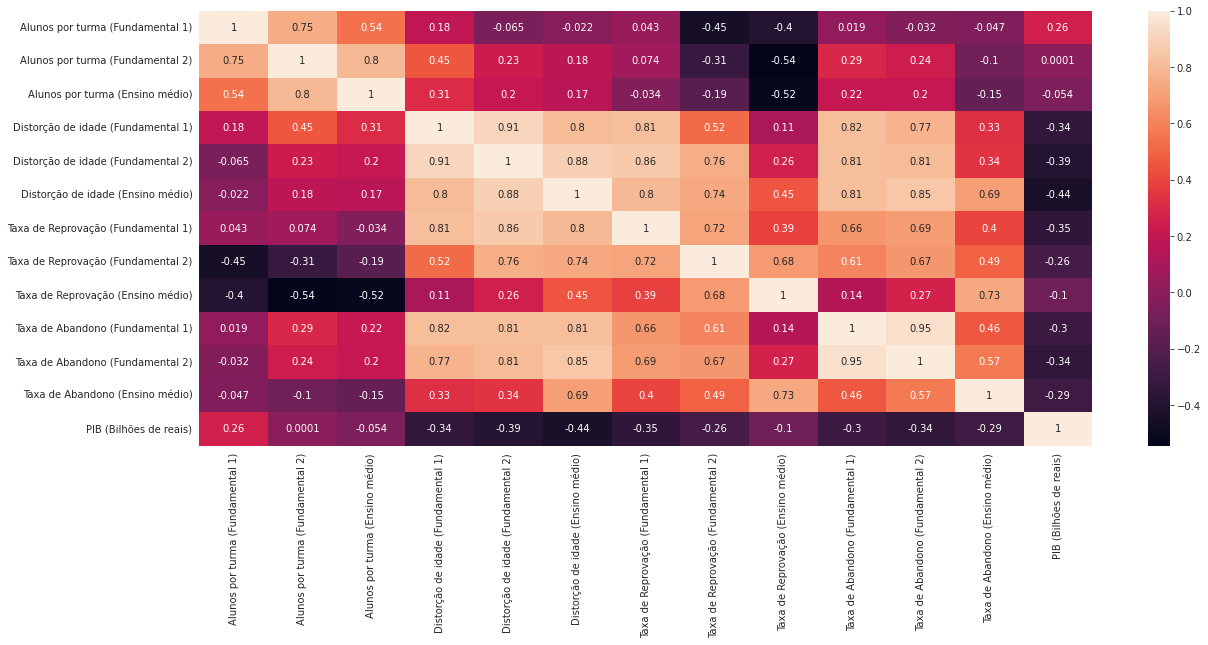

In [418]:
#Gráfico de correlação a fim de visualizar as possíveis relações entre os indicadores

corr = dados.corr()
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 8))
    ax = sns.heatmap(corr, annot = True)
    
#PIB inversamente proporcional a Reprovações, Taxas de Distorção de Idade e Taxas de Abandono
#Taxas de abandono se relacionam com taxas de reprovação e distorções de idade (Se agrava no ensino médio)
#O conjunto de diversos fatores afeta mais os anos finais do ensino fundamental
#As distorções de idade se propagam


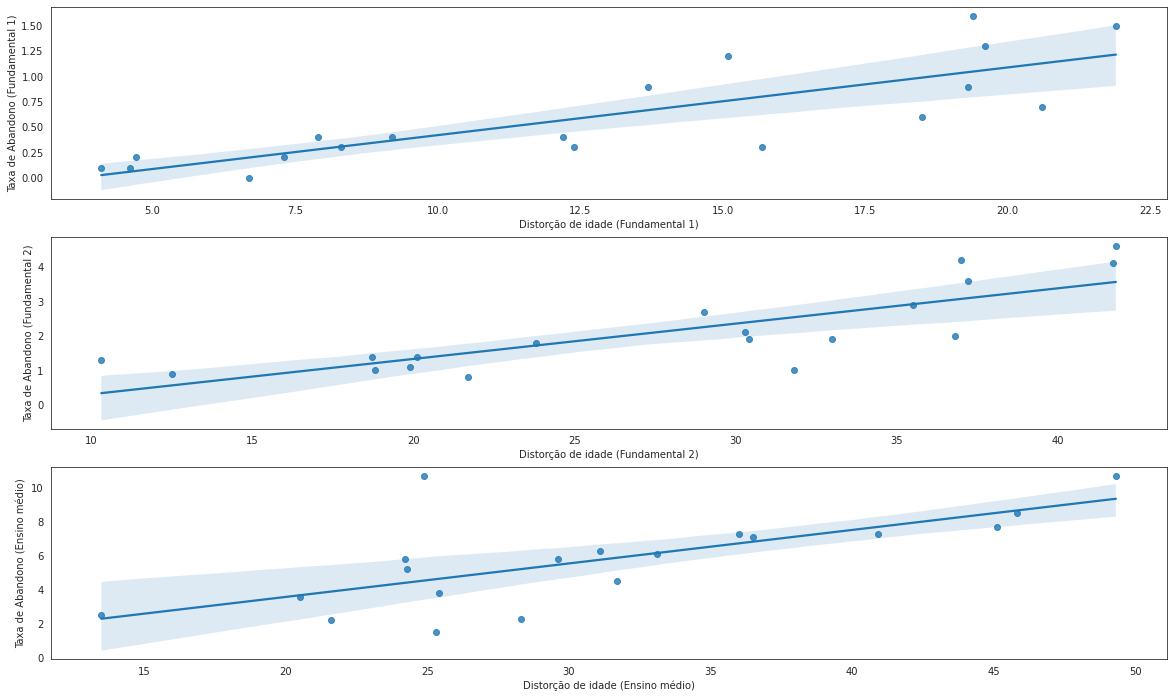

In [412]:
#Distorção de idade e taxa de abandono
#Pode demonstrar sobre retorno.

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 12),nrows = 3, ncols = 1)
    sns.regplot(ax = ax[0], y = dados['Taxa de Abandono (Fundamental 1)'], x = dados['Distorção de idade (Fundamental 1)'])
    sns.regplot(ax = ax[1], y = dados['Taxa de Abandono (Fundamental 2)'], x = dados['Distorção de idade (Fundamental 2)'])
    sns.regplot(ax = ax[2], y = dados['Taxa de Abandono (Ensino médio)'], x = dados['Distorção de idade (Ensino médio)'])

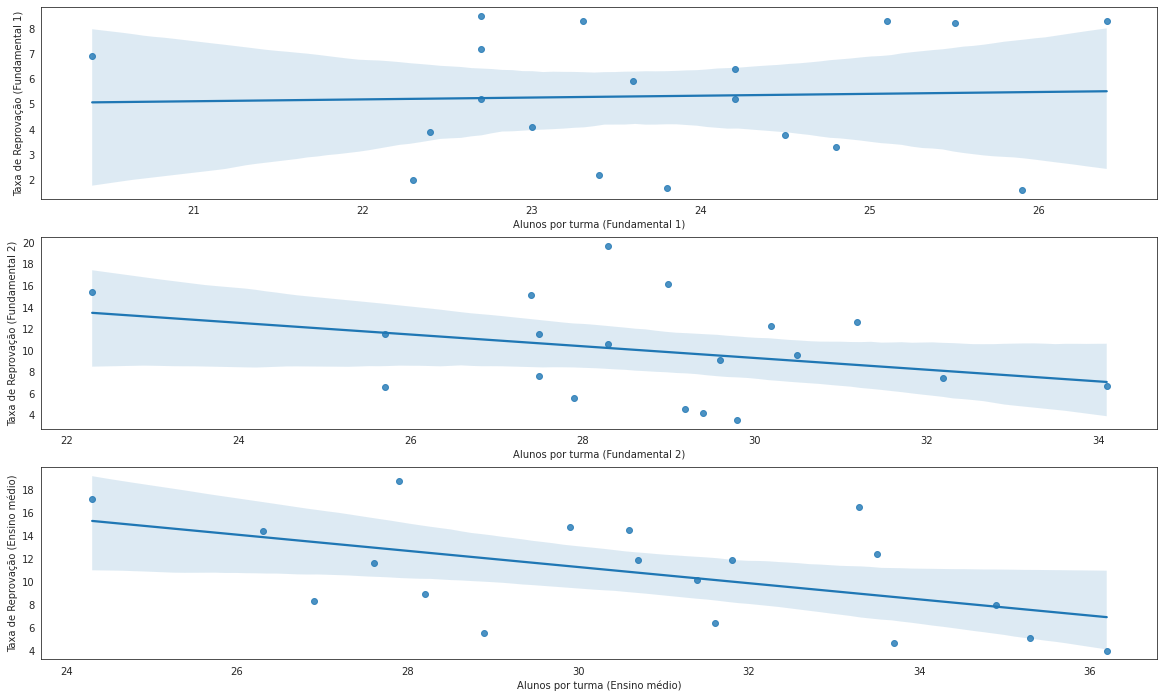

In [413]:
#Alunos por turma e taxas de reprovação
#Mostra acumulo de alunos ao longo das etapas

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 12),nrows = 3, ncols = 1)
    sns.regplot(ax = ax[0], x = dados['Alunos por turma (Fundamental 1)'], y = dados['Taxa de Reprovação (Fundamental 1)'])
    sns.regplot(ax = ax[1], x = dados['Alunos por turma (Fundamental 2)'], y = dados['Taxa de Reprovação (Fundamental 2)'])
    sns.regplot(ax = ax[2], x = dados['Alunos por turma (Ensino médio)'], y = dados['Taxa de Reprovação (Ensino médio)'])

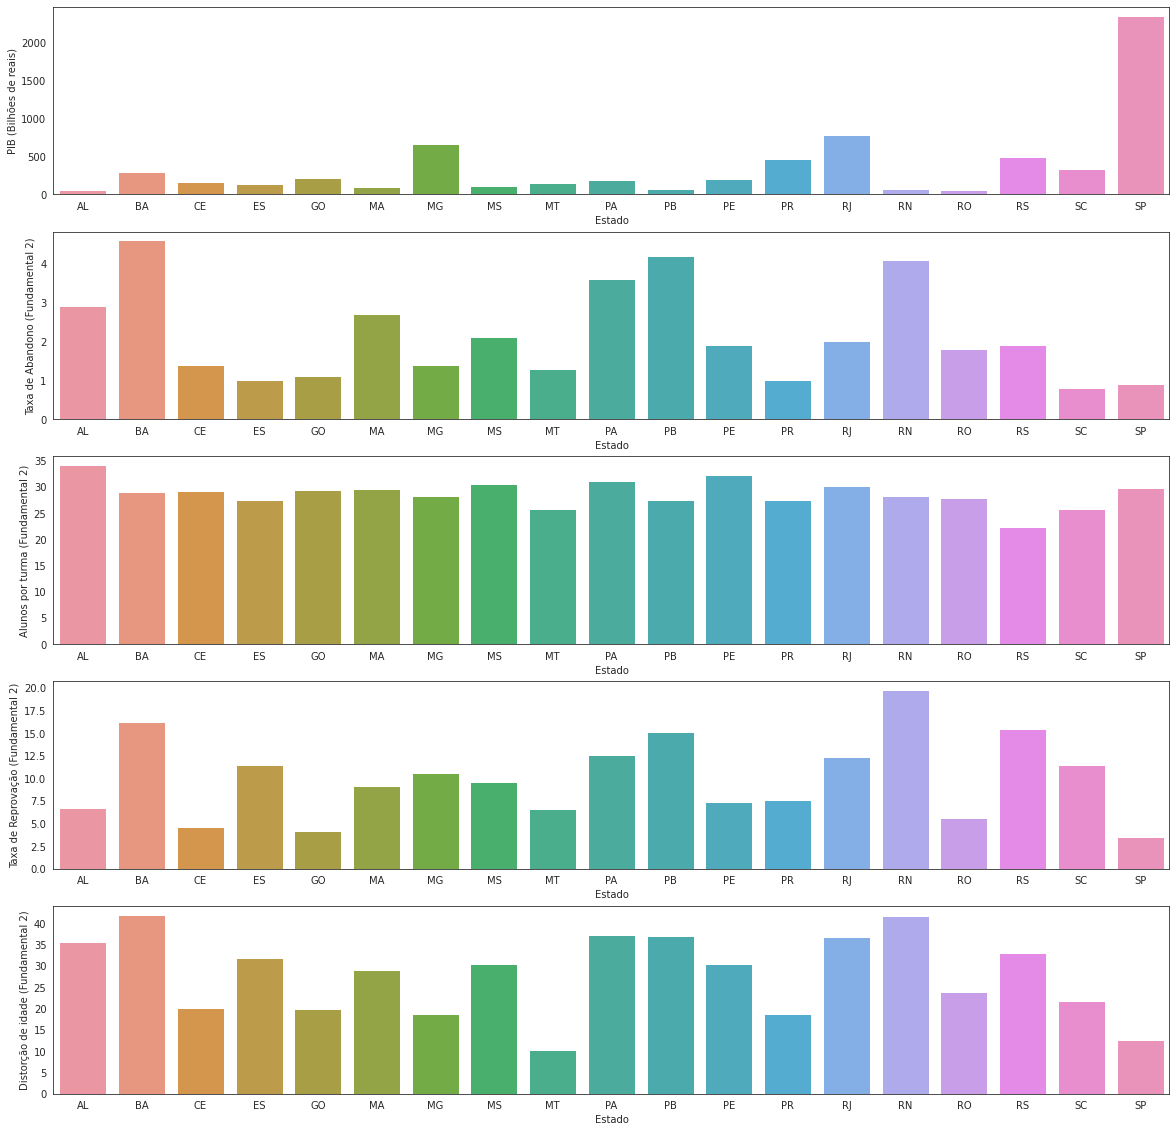

In [414]:
#Relação do PIB com os principais indicadores

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20),nrows = 5, ncols = 1)
    sns.barplot(ax = ax[0], y = dados['PIB (Bilhões de reais)'], x = dados['Estado'] )
    sns.barplot(ax = ax[1], y = dados['Taxa de Abandono (Fundamental 2)'], x = dados['Estado'])
    sns.barplot(ax = ax[2], y = dados['Alunos por turma (Fundamental 2)'], x = dados['Estado'])
    sns.barplot(ax = ax[3], y = dados['Taxa de Reprovação (Fundamental 2)'], x = dados['Estado'])
    sns.barplot(ax = ax[4], y = dados['Distorção de idade (Fundamental 2)'], x = dados['Estado'])